In [98]:
import numpy as np 
import random as rd
import time

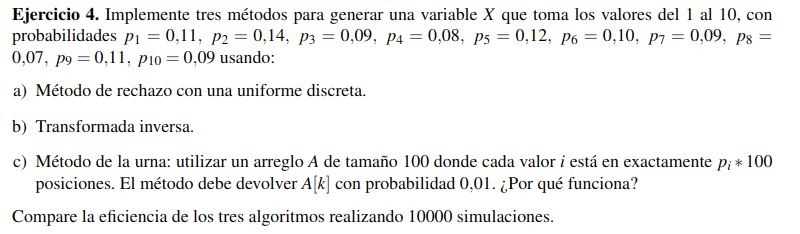

In [99]:
"""
Primero cargo las probabilidades de X en un arreglo
"""
prob_X = [0.11,0.14,0.09,0.08,0.12,0.10,0.09,0.07,0.11,0.09]

"""
Ahora debo encontrar el c tal que

P(X=xj)/P(Y=yi) <= c  , max valor para P(X) = 0.14, Y vale siempre 0,1

0,14/0,1 = 1,4 , es el minimo c.
"""

'\nAhora debo encontrar el c tal que\n\nP(X=xj)/P(Y=yi) <= c  , max valor para P(X) = 0.14, Y vale siempre 0,1\n\n0,14/0,1 = 1,4 , es el minimo c.\n'

In [100]:
def metodo_rechazo():
    while True:
        y = rd.randint(1,10)
        u = rd.random()
        if u < prob_X[y-1]/(0.14):
            return y

def simulacion_rechazo(nsims):
    start_time = time.time()
    simulacion = np.zeros(10)
    for i in range(nsims):
        u = metodo_rechazo()
        simulacion[u-1] += 1
    
    ocurrencias = simulacion/nsims
    end_time = time.time()
    return (ocurrencias, end_time-start_time)

In [101]:
def transformada_inversa():
    u = rd.random()
    acum = 0
    for i in range(10):
        acum += prob_X[i]
        if u < acum:
            return i+1
        
def simulacion_inversa(nsims):
    start_time = time.time()
    simulacion = []
    for i in range(nsims):
        simulacion.append(transformada_inversa())
    
    ocurrencias = np.zeros(10)
    for i in range(10):
        ocurrencias[i] = simulacion.count(i+1)/nsims

    end_time = time.time()
    return ocurrencias, end_time-start_time

In [107]:
urna = []
# cada valor i esta en la urna prob_X[i]*100 veces
for i in range(len(prob_X)):
    for j in range(int(prob_X[i]*100)):
        urna.append(i+1)


def metodo_urna():
    u = rd.randint(0, len(urna)-1)
    return urna[u]

def simulacion_urna(nsims):
    start_time = time.time()
    simulacion = []
    for i in range(nsims):
        simulacion.append(metodo_urna())
    
    ocurrencias = np.zeros(10)
    for i in range(10):
        ocurrencias[i] = simulacion.count(i+1)/nsims

    end_time = time.time()
    return ocurrencias, end_time-start_time

In [110]:
nsims = 10000
print("Prob real:")
print(prob_X)
print("=================================")
print("Simulacion metodo de rechazo: ")
ocurrencias, tiempo = simulacion_rechazo(nsims)
print(f"Ocurrrencias: {ocurrencias}")
print(f"Tiempo: {tiempo}")
print("=================================")
print("Simulacion metodo de transformada inversa: ")
ocurrencias_inv, tiempo_inv = simulacion_inversa(nsims)
print(f"Ocurrrencias: {ocurrencias_inv}")
print(f"Tiempo: {tiempo_inv}")

print("=================================")
print("Simulacion metodo de urna: ")
ocurrencias_urna, tiempo_urna = simulacion_urna(nsims)
print(f"Ocurrrencias: {ocurrencias_urna}")
print(f"Tiempo: {tiempo_urna}")

Prob real:
[0.11, 0.14, 0.09, 0.08, 0.12, 0.1, 0.09, 0.07, 0.11, 0.09]
Simulacion metodo de rechazo: 
Ocurrrencias: [0.1097 0.1468 0.0894 0.08   0.1153 0.1009 0.0907 0.072  0.1046 0.0906]
Tiempo: 0.012148618698120117
Simulacion metodo de transformada inversa: 
Ocurrrencias: [0.1111 0.1393 0.0905 0.0825 0.1219 0.0998 0.0881 0.0666 0.1069 0.0933]
Tiempo: 0.004960060119628906
Simulacion metodo de urna: 
Ocurrrencias: [0.1097 0.1407 0.0922 0.0806 0.1168 0.101  0.0912 0.0698 0.1091 0.0889]
Tiempo: 0.005338430404663086
